In [1]:
% matplotlib inline
import matplotlib.pyplot as plt

import tensorflow as tf

import sys
sys.path.insert(0, '/home/jr0th/github/segmentation/code/')
import helper.model_builder
import helper.metrics

import skimage.io

import numpy as np

import keras

Using TensorFlow backend.


RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

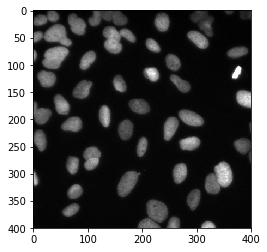

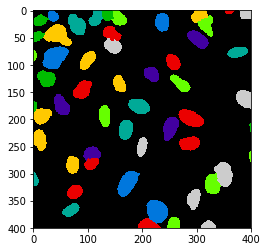

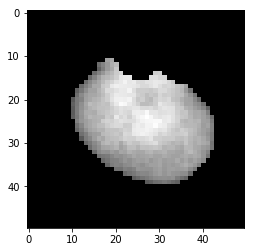

In [2]:
img = skimage.io.imread('/home/jr0th/github/segmentation/data/BBBC022_hand_200/images_normalized_8bit/IXMtest_A02_s1_w1051DAA7C-7042-435F-99F0-1E847D9B42CB.png')

plt.imshow(img[:400,:400], cmap="gray")
plt.show()
plt.imsave('img.png', img[:400,:400], cmap="gray")
annot = skimage.io.imread('/home/jr0th/github/segmentation/data/BBBC022_hand_200/raw_annotations/IXMtest_A02_s1_w1051DAA7C-7042-435F-99F0-1E847D9B42CB.png')[:,:,0]
label = skimage.morphology.label(annot)
plt.imshow((label[:400,:400] + 10 * (label[:400,:400] != 0)) % 9, cmap='nipy_spectral')
plt.show()
plt.imsave('lab.png', (label[:400,:400] + 10 * (label[:400,:400] != 0)) % 9, cmap='nipy_spectral')

plt.imshow(img[40:90,120:170] * (label[40:90,120:170] == 25), cmap='gray')
plt.show()
plt.imsave('sce.png', img[40:90,120:170] * (label[40:90,120:170] == 25), cmap='gray')

In [3]:
# build session running on a specific GPU
configuration = tf.ConfigProto()
configuration.gpu_options.allow_growth = True
configuration.gpu_options.visible_device_list = "2"
session = tf.Session(config = configuration)

keras.backend.set_session(session)

In [4]:
img_path = '/home/jr0th/github/segmentation/data/BBBC022_hand_200/images_normalized_8bit/IXMtest_D20_s3_w19D371AF3-0189-48A3-AF3B-D108DE6A017F.png'
ann_path = '/home/jr0th/github/segmentation/data/BBBC022_hand_200/raw_annotations/IXMtest_D20_s3_w19D371AF3-0189-48A3-AF3B-D108DE6A017F.png'
bdry_path = '/home/jr0th/github/segmentation/data/BBBC022_hand_200/boundary_4/IXMtest_D20_s3_w19D371AF3-0189-48A3-AF3B-D108DE6A017F.png'
cp_seg_path = '/home/jr0th/github/segmentation/experiments/BBBC022_hand_200/CP_labels/IXMtest_D20_s3_w19D371AF3-0189-48A3-AF3B-D108DE6A017F.png'

img_orig = skimage.io.imread(img_path)

# get image
dim1 = img_orig.shape[0]
dim2 = img_orig.shape[1]

img_rescaled = img_orig / 255
img_input = img_rescaled.reshape((1, dim1, dim2, 1))


# build model and load weights
model = helper.model_builder.get_model_1_class(dim1, dim2)

/home/jr0th/github/segmentation/code/helper/model_builder.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  a = keras.layers.Convolution2D(64, 3, 3, **option_dict_conv)(x)
/home/jr0th/github/segmentation/code/helper/model_builder.py:27: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(momentum=0.9)`
  a = keras.layers.BatchNormalization(**option_dict_bn)(a)
/home/jr0th/github/segmentation/code/helper/model_builder.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  a = keras.layers.Convolution2D(64, 3, 3, **option_dict_conv)(a)
/home/jr0th/github/segmentation/code/helper/model_builder.py:33: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(momentum=0.9)`
  a = keras.layers.BatchNormalization(**option_dict_bn)(a)
/home/jr0th/github/segmentation/code/helper/mode

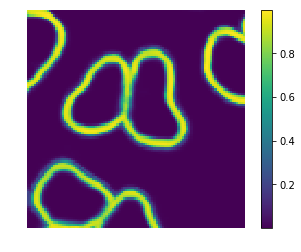

In [5]:
weights = '/home/jr0th/github/segmentation/checkpoints/boundary_4_random_augment/checkpoint_0099.hdf5'
model.load_weights(weights)
pred = model.predict(img_input).squeeze()
plt.imshow(pred[0:100, 0:100])
plt.axis('off')
plt.colorbar()
plt.savefig('vis_dl_probmap.png')

/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


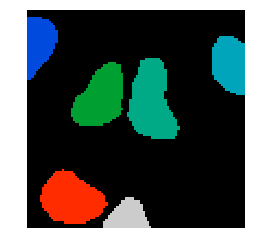

In [6]:
contour = helper.metrics.probmap_to_contour(pred)
label = helper.metrics.contour_to_label(contour, img_rescaled)
vis = skimage.segmentation.mark_boundaries(img_orig, label, color=(1,0,0), mode='thick')
plt.imshow(label[0:100, 0:100], cmap='nipy_spectral')
plt.axis('off')
plt.savefig('vis_dl.png')

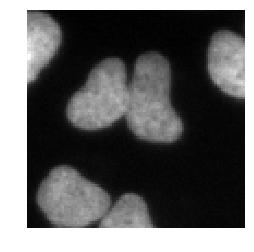

In [7]:
img = skimage.io.imread(img_path)
plt.imshow(img[0:100, 0:100], cmap='gray')
plt.axis('off')
plt.savefig('vis_orig.png')

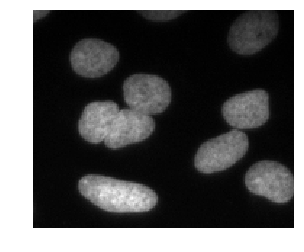

In [8]:
img_path = '/home/jr0th/github/segmentation/data/BBBC022_hand_200/images_normalized_8bit/IXMtest_B05_s5_w10296BEF4-0F48-4EC8-BC24-6C604871398B.png'
img=skimage.io.imread(img_path)
plt.imshow(img.squeeze()[0:150,420:600], cmap='gray')
plt.axis('off')
plt.savefig('clumped_img.png')

In [9]:
# use latest checkpoint
weights_path = '/home/jr0th/github/segmentation/checkpoints/3class_2/checkpoint_0001.hdf5'
model = helper.model_builder.get_model_3_class(dim1, dim2)
model.load_weights(weights_path)

pred = model.predict(img.reshape(1,dim1,dim2,1)/255).squeeze()

/home/jr0th/github/segmentation/code/helper/model_builder.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  a = keras.layers.Convolution2D(64, 3, 3, **option_dict_conv)(x)
/home/jr0th/github/segmentation/code/helper/model_builder.py:27: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(momentum=0.9)`
  a = keras.layers.BatchNormalization(**option_dict_bn)(a)
/home/jr0th/github/segmentation/code/helper/model_builder.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  a = keras.layers.Convolution2D(64, 3, 3, **option_dict_conv)(a)
/home/jr0th/github/segmentation/code/helper/model_builder.py:33: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(momentum=0.9)`
  a = keras.layers.BatchNormalization(**option_dict_bn)(a)
/home/jr0th/github/segmentation/code/helper/mode

(150, 180)


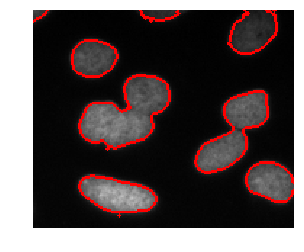

In [10]:
argmax = np.argmax(pred[0:150,420:600], axis=2)
nuclei = (argmax == 1)
print(nuclei.shape)

plt.figure()

boundary = skimage.segmentation.mark_boundaries(img[0:150,420:600], nuclei, color=(1,0,0), mode='thick', )
plt.imshow(boundary)
plt.axis('off')
plt.savefig('clumped_bdr.png')